In [3]:
import os


In [5]:
os.environ["OMP_NUM_THREADS"] = "1"

In [7]:
 import pandas as pd

In [9]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [14]:
from sklearn.cluster import KMeans

In [15]:
file_path =("C:/Users/Sri Thanuja/Documents/mallcostumers dataset/Mall_Customers.csv")

In [19]:
df = pd.read_csv(file_path)

In [21]:
print("Dataset Overview:")

Dataset Overview:


In [23]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [25]:
print("\nDataset Information:")


Dataset Information:


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [29]:
print("\nMissing Values:")


Missing Values:


In [31]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [33]:
df = df.drop(['CustomerID'], axis=1)


In [35]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

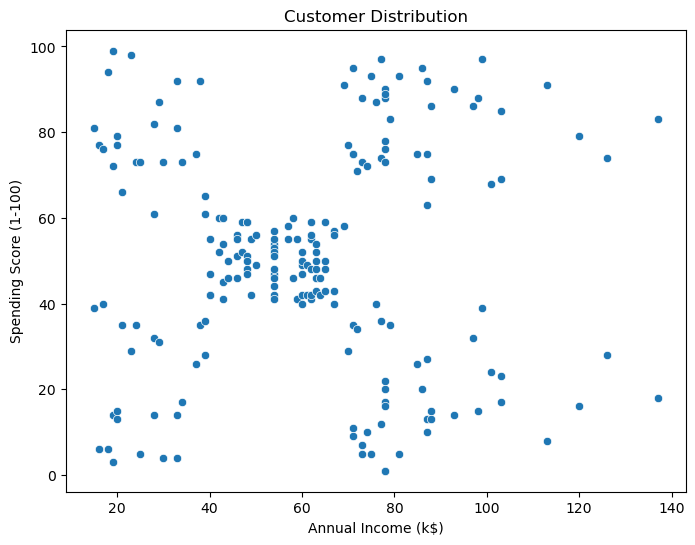

In [37]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [43]:
wcss = []

In [45]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42) 
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

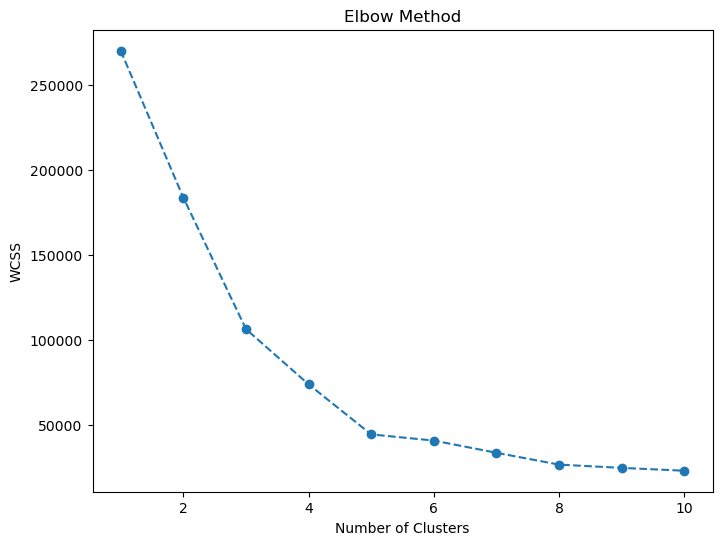

In [97]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
optimal_clusters = 5

In [99]:
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

In [101]:
df['Cluster'] = kmeans.labels_

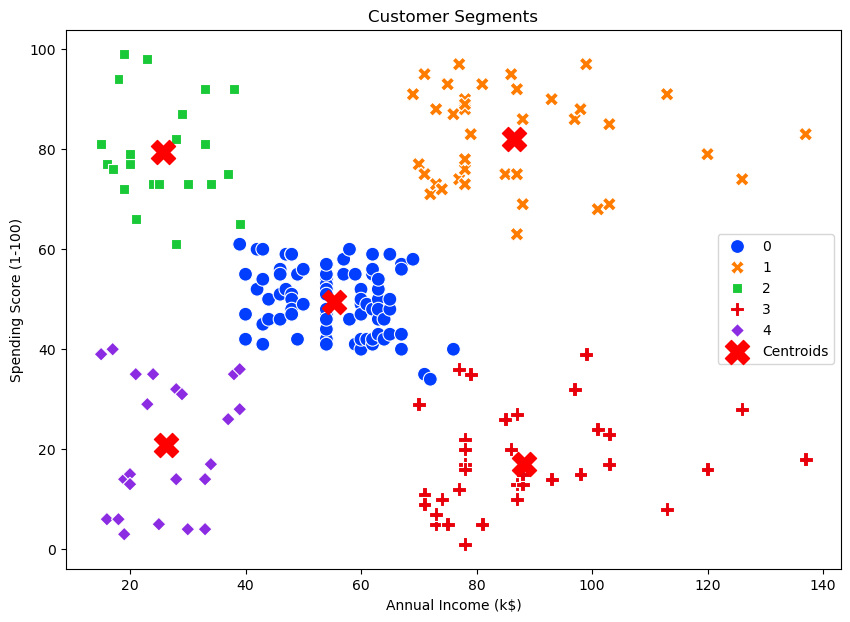

In [93]:
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='bright', style='Cluster', s=100
)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [95]:
print("\nFinal Dataset with Clusters:")
print(df.head())


Final Dataset with Clusters:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        4
1    Male   21                  15                      81        2
2  Female   20                  16                       6        4
3  Female   23                  16                      77        2
4  Female   31                  17                      40        4
